# REPORTE PRÁCTICA 8: Análisis de varianza y de componentes principales

# Análisis de Datos Multivariado 

#  Caso de Estudio: 
## Condiciones en los Centros de Reinserción Social CERESO y Topo Chico   


####    Evely Gutiérrez Noda     #1935050


# Introducción

En el siguiente reporte se analiza el caso de estudio que permitirá evaluar las condiciones de reinserción social dentro del CERESO "Apodaca" y dentro del Centro Preventivo de Reinserción Topo Chico. Los datos que se usan para este estudio provienen de encuestas realizadas a mujeres y hombres, que se encuentran privados de libertad dentro del Centro de Reinserción. 

En esta práctica se busca el objetivo de realizar un análisis de varianza utilizando [**ANOVA**](https://pythonfordatascience.org/anova-python/) e intentar realizar un **PCA** en dos dimensiones para ver si se logran separar los hombres de las mujeres internas como dos clases de una forma clara. Además, se visualizan y discuten los resultados del **ANOVA** y del **PCA**.

**ANOVA** es un proceso estadístico para analizar la cantidad de varianza que se contribuye a una muestra por diferentes factores. La hipótesis nula sería que no haya diferencias, es decir, si el valor p de una variable es menor a la significancia establecida (trabajando con un Alpha 0.05), entonces se rechaza la hipótesis nula, concluyendo que esa variable sí tiene un efecto estadísticamente significativo.

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']  # Para los internos Hombres
datos = pd.concat([x.loc[x.age >= 16], x.loc[~isnan(x.age)]])
d = pd.DataFrame(datos, columns = ["sentenceYears", "age", "incomePrev"])
d = d.dropna() 
m = ols('sentenceYears ~ age + incomePrev ', data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.05
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "no "))

                  sum_sq     df          F    PR(>F)
age          1548.702158    1.0  10.091688  0.001593
incomePrev   1680.636422    1.0  10.951401  0.001011
Residual    68291.096829  445.0        NaN       NaN
age es significativo
incomePrev es significativo
Residual no es significativo


A pesar de que las variables son significativas, el valor de los residuos es muy alto, por tanto, se agregan otras columnas de datos que puedan marcar diferencias:
- nivel de educación
- tipo de crimen cometido
- estado civil del interno
- si tienen hijos o no
- si es primera vez o no que están cumpliendo condena.

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']  # Para los internos Hombres
datos = pd.concat([x.loc[x.age >= 16], x.loc[~isnan(x.age)]])
d = pd.DataFrame(datos, columns = ["sentenceYears", "age", "incomePrev", "education","crime", "prevRelStatus", "hasChildren", "firstOffense"])
d = d.dropna() 
m = ols('sentenceYears ~ age + incomePrev + education + crime + prevRelStatus + hasChildren + firstOffense', data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.05
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "NO "))

                     sum_sq     df             F    PR(>F)
age             1366.109398    1.0  1.157860e+01  0.000870
incomePrev         0.000115    1.0  9.724117e-07  0.999215
education        613.501213    1.0  5.199791e+00  0.024100
crime           1521.854335    1.0  1.289863e+01  0.000454
prevRelStatus     82.440547    1.0  6.987331e-01  0.404634
hasChildren       54.282905    1.0  4.600802e-01  0.498706
firstOffense     479.518822    1.0  4.064210e+00  0.045714
Residual       16518.005357  140.0           NaN       NaN
age es significativo
incomePrev NO es significativo
education es significativo
crime es significativo
prevRelStatus NO es significativo
hasChildren NO es significativo
firstOffense es significativo
Residual NO es significativo


En este caso bajó notablemente el valor residual, y tres de las variables resultaron ser significativas, la edad, la educación y el crimen cometido. Es interesante ver las interacciones entre estos factores para ver cómo se comportan.

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']
datos = pd.concat([x.loc[x.age >= 16], x.loc[~isnan(x.age)]]) 
d = pd.DataFrame(datos, columns = ["sentenceYears", "age", "incomePrev", "education","crime", "prevRelStatus", "hasChildren", "firstOffense"])

d = d.dropna() 
m = ols('sentenceYears ~ age * education + age * crime + education * crime  ', \
        data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.05
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "NO "))

                       sum_sq     df          F    PR(>F)
age               1609.157272    1.0  13.976287  0.000268
education          812.769656    1.0   7.059287  0.008795
age:education      505.467586    1.0   4.390224  0.037934
crime             1085.692416    1.0   9.429749  0.002562
age:crime           87.376995    1.0   0.758910  0.385151
education:crime    246.112154    1.0   2.137600  0.145952
Residual         16234.008946  141.0        NaN       NaN
age es significativo
education es significativo
age:education es significativo
crime es significativo
age:crime NO es significativo
education:crime NO es significativo
Residual NO es significativo


Según lo anterior parece haber interacción solo en la edad y la educación de los internos hombres en este caso.

Con el objetivo de tratar de reducir múltiples variables de entrada en una menor cantidad para modelar la variable de interés se realiza un análisis de componentes principales (PCA). Primeramente, se realizan algunas modificaciones en los datos que se tienen y se guardan en un fichero nuevo .csv, y se trabaja solo con las columnas que convienen codificar con números. Se estandarizan rangos para los valores que se van a tomar en cuenta y se visualizan los datos finales que quedan en el fichero resultante. Los datos estandarizados son los siguientes:

- Crimen
- Años de sentencia
- Educación
- Edad
- Si tenían trabajo o no antes de cometer un delito
- Si es primera vez o no que están privados de la libertad
- Los ingresos mensuales antes de estar privados de la libertad

In [10]:
import ssl
import pandas as pd
from numpy import isnan, nan
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
                                                                                                                  
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']
d = pd.concat([x.loc[x.age >= 16], x.loc[~isnan(x.age)]]) 
print('Qué tenemos')
print(d.columns)
d = d.drop(['Unnamed: 0', 'Unnamed: 0.1',
       'gender', 'hasChildren', 'numberOfChildren',
       'howManyBornInPrisonFOAQ', 'childrenLiveInPrisonFOAQ',
       'childrenSegPopFOAQ', 'childrenSocialSecurityFOAQ', 'prevRelStatus',
       'crimen','educacion'], 1)

print('Qué categorizamos tal cual')
for c in ['crime', 'sentenceYears', 'education',
       'age', 'workedBeforeFOAQ', 'firstOffense', 'incomePrev']:
    cat = pd.Categorical(d[c])
    d[c] = cat.codes

for c in d.columns:
    print(d[c].unique(), d[c].dtype)   
xVars = ['crime', 'sentenceYears', 'education',
       'age', 'workedBeforeFOAQ', 'firstOffense', 'incomePrev']


d = d.dropna() 
x = d.loc[:, xVars].values
x = StandardScaler().fit_transform(x)
y1 = d.loc[:,['age']].values
y2 = d.loc[:,['sentenceYears']].values
k = 2 # Para dos dimensiones 
pca = PCA(n_components = k)
cd = pd.DataFrame(data = pca.fit_transform(x), columns = ['comp_{:d}'.format(i) for i in range(k)])
cd['age'] = y1
cd['sentenceYears'] = y2
ordenado = pd.DataFrame.sort_values(cd, ['age'], ascending = False)
display(cd.head(10))
cd.to_csv('practica7.csv')

Qué tenemos
Index(['Unnamed: 0', 'Unnamed: 0.1', 'crime', 'sentenceYears', 'education',
       'age', 'gender', 'hasChildren', 'numberOfChildren',
       'howManyBornInPrisonFOAQ', 'childrenLiveInPrisonFOAQ',
       'childrenSegPopFOAQ', 'childrenSocialSecurityFOAQ', 'prevRelStatus',
       'workedBeforeFOAQ', 'firstOffense', 'incomePrev', 'crimen',
       'educacion'],
      dtype='object')
Qué categorizamos tal cual
[ 0  1  2  3 18  4  5  7  6 16  8 -1 11 14 19 17 12 13  9 15 10] int8
[ 5 34 31  7 24 35 16 18 21  1 14  3  0 -1 10  4  6 15  2 11 23  9 17 27
  8 36 30 12 19 26 38 13 33 28 39 22 32 37 20 29 25] int8
[ 1  0  2 -1  3  4  5] int8
[11 18 22 15  8 23 19 24 37 30 14  5 17 16  6  9 31 13 35 26  7 25 10 28
 21  1 36 27 33  4  2 12 20 51 29 38 41 44 34 47 43 42 45 50 40 49 48 39
 46 32  3  0] int8
[-1] int8
[ 0  1 -1] int8
[ 1  0  2  3 -1] int8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,comp_0,comp_1,age,sentenceYears
0,0.157177,-0.590874,11,5
1,-2.105771,1.053757,18,34
2,-0.898662,1.563234,22,31
3,0.665591,-0.073561,15,7
4,0.675029,-0.367518,8,7
5,-0.628008,1.277725,23,24
6,0.003116,2.125808,19,35
7,-0.281785,0.864108,24,16
8,-1.018384,1.563524,37,18
9,-1.709348,0.952062,30,21


Se visualiza la información en dos dimensiones, para analizar si se separan de alguna forma clara las clases de hombres internos por su edad, sentencia o si no hay unión entre estos dos factores.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


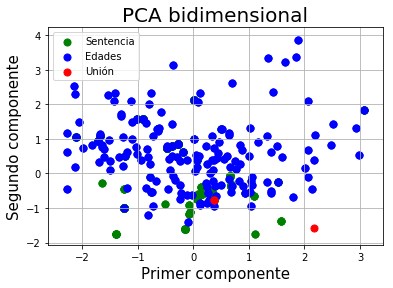

In [11]:
import ssl
import pandas as pd
from numpy import isnan, nan
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
                                                                                                                  
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv('practica7.csv')


pri = d.sentenceYears
seg = d.age >=16
ter = ~ (pri | seg)


plt.title('PCA bidimensional', fontsize = 20)
plt.xlabel('Primer componente', fontsize = 15)
plt.ylabel('Segundo componente', fontsize = 15)
plt.scatter(d.loc[pri].comp_0, d.loc[pri].comp_1, c = 'g', s = 50)
plt.scatter(d.loc[seg].comp_0, d.loc[seg].comp_1, c = 'b', s = 50)
plt.scatter(d.loc[ter].comp_0, d.loc[ter].comp_1, c = 'r', s = 50)
plt.legend(['Sentencia', 'Edades', 'Unión'])
plt.grid()

Con el diagrama anterior se ve que se separan un poco el factor edad de los hombres con el factor años de sentencia que tienen, en cabio la unión de estos factores es casi nula. Entonces en este caso y con este análisis se pudieran separar de forma clara estos factores.